In [28]:
%reset -f
from __future__ import print_function
import pandas as pd
import numpy as np
import numpy.linalg as nla
import pandas as pd
import re
import six
from os.path import join
from matplotlib import pyplot as plt

import tensorflow.compat.v1 as tf
#tf.disable_v2_behaviour()


In [29]:
#Set the output display to have one digit for decimal places and liit it
#to printing 15 rows

pd.options.display.float_format = '{:.2f}'.format
pd.options.display.max_rows = 15
#Load and Clean data
choc_data = pd.read_csv("ssm/flavors_of_cacao.csv")
choc_data

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
...,...,...,...,...,...,...,...,...,...
1790,Zotter,Peru,647,2011,70%,Austria,3.75,,Peru
1791,Zotter,Congo,749,2011,65%,Austria,3.00,Forastero,Congo
1792,Zotter,Kerala State,749,2011,65%,Austria,3.50,Forastero,India
1793,Zotter,Kerala State,781,2011,62%,Austria,3.25,,India


In [30]:
#Rename the columns
choc_data.columns=['maker', 'specific_origin', 'reference_number', 
                   'review_date', 'cocoa_percent', 'maker_location', 
                   'rating', 'bean_type', 'broad_origin']
choc_data

,maker,specific_origin,reference_number,review_date,cocoa_percent,maker_location,rating,bean_type,broad_origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
...,...,...,...,...,...,...,...,...,...
1790,Zotter,Peru,647,2011,70%,Austria,3.75,,Peru
1791,Zotter,Congo,749,2011,65%,Austria,3.00,Forastero,Congo
1792,Zotter,Kerala State,749,2011,65%,Austria,3.50,Forastero,India
1793,Zotter,Kerala State,781,2011,62%,Austria,3.25,,India


In [31]:
#Check the datatypes
choc_data['bean_type'] = choc_data['bean_type'].astype(str)

choc_data.dtypes

maker                object
specific_origin      object
reference_number      int64
review_date           int64
cocoa_percent        object
maker_location       object
rating              float64
bean_type            object
broad_origin         object
dtype: object

In [32]:
#Replace empty/null values with "Blend"
#choc_data['bean_type'] = choc_data['bean_type'].fillna('Blend')
#choc_data

In [33]:
# Replace empty/null values with "Blend"
#choc_data['bean_type'] = choc_data['bean_type'].fillna('Blend')
choc_data['bean_type'].astype(str)
choc_data['bean_type'].str.replace('\xa0', '', regex=True)
choc_data['bean_type'] = choc_data['bean_type'].str.replace('$', '', regex=True)
choc_data['bean_type'] = choc_data['bean_type'].replace('', 'Blend')
choc_data

,maker,specific_origin,reference_number,review_date,cocoa_percent,maker_location,rating,bean_type,broad_origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
...,...,...,...,...,...,...,...,...,...
1790,Zotter,Peru,647,2011,70%,Austria,3.75,,Peru
1791,Zotter,Congo,749,2011,65%,Austria,3.00,Forastero,Congo
1792,Zotter,Kerala State,749,2011,65%,Austria,3.50,Forastero,India
1793,Zotter,Kerala State,781,2011,62%,Austria,3.25,,India


In [34]:
#@title Cast bean_type to string to remove leading 'u'
choc_data['bean_type'] = choc_data['bean_type'].astype(str)
choc_data['cocoa_percent'] = choc_data['cocoa_percent'].astype(str)
choc_data['cocoa_percent'] = choc_data['cocoa_percent'].str.strip('%')
choc_data['cocoa_percent'] = pd.to_numeric(choc_data['cocoa_percent'])
choc_data

,maker,specific_origin,reference_number,review_date,cocoa_percent,maker_location,rating,bean_type,broad_origin
0,A. Morin,Agua Grande,1876,2016,63.00,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70.00,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70.00,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70.00,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70.00,France,3.50,,Peru
...,...,...,...,...,...,...,...,...,...
1790,Zotter,Peru,647,2011,70.00,Austria,3.75,,Peru
1791,Zotter,Congo,749,2011,65.00,Austria,3.00,Forastero,Congo
1792,Zotter,Kerala State,749,2011,65.00,Austria,3.50,Forastero,India
1793,Zotter,Kerala State,781,2011,62.00,Austria,3.25,,India


In [35]:
#Correct spelling mistakes, and replace city with country name
choc_data['maker_location'] = choc_data['maker_location']\
.str.replace('Amsterdam', 'Holland')\
.str.replace('U.K.', 'England')\
.str.replace('Niacragua', 'Nicaragua')\
.str.replace('Domincan Repulic', 'Dominican Republic')


In [36]:
#Adding this so that Holland and Netherlands map to the same country
choc_data['maker_location'] = choc_data['maker_location'].str.replace('Holland', 'Netherlands')

In [37]:
def cleanup_spelling_abbrev(text):
    replacements = [
        ['-', ', '], ['/ ', ', '], ['/', ', '], ['\(', ', '], [' and', ', '], [' &', ', '], ['\)', ''],
        ['Dom Rep|DR|Domin Rep|Dominican Rep,|Domincan Republic', 'Dominican Republic'],
        ['Mad,|Mad$', 'Madagascar, '],
        ['PNG', 'Papua New Guinea, '],
        ['Guat,|Guat$', 'Guatemala, '],
        ['Ven,|Ven$|Venez,|Venez$', 'Venezuela, '],
        ['Ecu,|Ecu$|Ecuad,|Ecuad$', 'Ecuador, '],
        ['Nic,|Nic$', 'Nicaragua, '],
        ['Cost Rica', 'Costa Rica'],
        ['Mex,|Mex$', 'Mexico, '],
        ['Jam,|Jam$', 'Jamaica, '],
        ['Haw,|Haw$', 'Hawaii, '],
        ['Gre,|Gre$', 'Grenada, '],
        ['Tri,|Tri$', 'Trinidad, '],
        ['C Am', 'Central America'],
        ['S America', 'South America'],
        [', $', ''], [',  ', ', '], [', ,', ', '], ['\xa0', ' '],[',\s+', ','],
        [' Bali', ',Bali']
    ]
    for i,j in replacements:
        text = re.sub(i, j, text)
    return text

In [38]:
choc_data['specific_origin'] = choc_data['specific_origin'].str.replace('.','').apply(cleanup_spelling_abbrev)

In [39]:
choc_data

,maker,specific_origin,reference_number,review_date,cocoa_percent,maker_location,rating,bean_type,broad_origin
0,A. Morin,Agua Grande,1876,2016,63.00,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70.00,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70.00,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70.00,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70.00,France,3.50,,Peru
...,...,...,...,...,...,...,...,...,...
1790,Zotter,Peru,647,2011,70.00,Austria,3.75,,Peru
1791,Zotter,Congo,749,2011,65.00,Austria,3.00,Forastero,Congo
1792,Zotter,Kerala State,749,2011,65.00,Austria,3.50,Forastero,India
1793,Zotter,Kerala State,781,2011,62.00,Austria,3.25,,India


In [40]:
#@title Cast specific_origin to string
choc_data['specific_origin'] = choc_data['specific_origin'].astype(str)

#@title Replace null-valued fields with the same value as for specific_origin
choc_data['broad_origin'] = choc_data['broad_origin'].fillna(choc_data['specific_origin'])

#@title Clean up spelling mistakes and deal with abbreviations
choc_data['broad_origin'] = choc_data['broad_origin'].str.replace('.', '').apply(cleanup_spelling_abbrev)

# Change 'Trinitario, Criollo' to "Criollo, Trinitario"
# Check with choc_data['bean_type'].unique()
choc_data.loc[choc_data['bean_type'].isin(['Trinitario, Criollo']),'bean_type'] = "Criollo, Trinitario"
# Confirm with choc_data[choc_data['bean_type'].isin(['Trinitario, Criollo'])]

# Fix chocolate maker names
choc_data.loc[choc_data['maker']=='Shattel','maker'] = 'Shattell'
choc_data['maker'] = choc_data['maker'].str.replace(u'Na\xef\xbf\xbdve','Naive')

choc_data.head(10)

,maker,specific_origin,reference_number,review_date,cocoa_percent,maker_location,rating,bean_type,broad_origin
0,A. Morin,Agua Grande,1876,2016,63.00,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70.00,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70.00,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70.00,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70.00,France,3.50,,Peru
5,A. Morin,Carenero,1315,2014,70.00,France,2.75,Criollo,Venezuela
6,A. Morin,Cuba,1315,2014,70.00,France,3.50,,Cuba
7,A. Morin,Sur del Lago,1315,2014,70.00,France,3.50,Criollo,Venezuela
8,A. Morin,Puerto Cabello,1319,2014,70.00,France,3.75,Criollo,Venezuela
9,A. Morin,Pablino,1319,2014,70.00,France,4.00,,Peru


In [73]:
#choc_data.drop(columns=['review_date','reference_number'],inplace=True)
len(choc_data.columns)

9

In [20]:
choc_data.to_csv("newfile.csv", index=False)

### Functions to Build and Train a Similarity DNN Model

In [63]:
from __future__ import print_function
import pandas as pd
import numpy as np
import numpy.linalg as nla
import pandas as pd
import re
import six
from os.path import join
from matplotlib import pyplot as plt

import tensorflow.compat.v1 as tf
#@title Functions to Build and Train a Similarity DNN Model
class SimilarityModel(object):
  """Class to build, train, and inspect a Similarity Model.
  This class builds a deep neural network that maps a dataset of entities
  with heterogenous features to an embedding space.
  Given a dataset as a pandas dataframe, determine the model by specifying
  the set of features used as input and as labels to the DNN, and the
  size of each hidden layer. The data is mapped to the embedding space
  in the last hidden layer.

  To build an auto-encoder, make the set of output features identical to the set
  of input features. Alternatively, build a predictor by using a single feature
  as the label. When using a single feature as a label, ensure
  this feature is removed from the input, or add at least
  one hidden layer of a sufficiently low dimension such that the model cannot
  trivially learn the label.
  Caveat: The total loss being minimized is a simple sum of losses for each
    output label (plus the regularization). If the output feature set combines
    sparse and dense features, the total loss is a sum of cross-entropy soft-max
    losses with root mean squared error losses, potentially in different scales,
    which could emphasis some output labels more than others.
  """

  def __init__(self,
               dataframe,
               input_feature_names,
               output_feature_names,
               dense_feature_names,
               sparse_input_feature_embedding_dims,
               hidden_dims=[32],
               l2_regularization=0.0,
               use_bias=True,
               batch_size=100,
               inspect=False):
    """Build a similarity model.
    Args:
      dataframe: the pandas dataframe used to train and validate the model.
      input_feature_names: list of strings, names of input feature columns.
      output_feature_names: list of strings, names of output feature columns.
      dense_feature_names: list of strings, names of feature columns that are
        treated as dense. All other feature columns are treated as sparse.
      sparse_input_feature_embedding_dims: dictionary that maps feature names to
        ints, expressing the embedding dimension of each input feature. Any
        sparse feature in input_feature_names must be in this dictionary.
      hidden_dims: list of ints, dimensions of each hidden layer. These hidden
        layers are not counting the first layer which is a concatenation of the
        input embeddings and the dense input features. Hence, this list can be
        empty, in which case the outputs of the network are directly connected
        to the input embeddings and/or dense inputs.
      use_bias: bool, if true, add a bias term to each hidden layer.
      batch_size: int, batch size.
      inspect: bool, if true, add each tensor of the model to the list of
        tensors that are inspected.
    """
    used_feature_names = tuple(
        set(input_feature_names).union(output_feature_names))
    sparse_feature_names = tuple(
        set(used_feature_names).difference(dense_feature_names))
    # Dictionary mapping each sparse feature column to its vocabulary.
    ### sparse_feature_vocabs = { 'maker': [u'A. Morin', u'AMMA', ...], ... }
    sparse_feature_vocabs = {
        sfn: sorted(list(set(choc_data[sfn].values)))
        for sfn in sparse_feature_names
    }

    # Sparse output features are mapped to ids via tf.feature_to_id, hence
    # we need key-id pairs for these vocabularies.
    sparse_output_feature_names = (
        tuple(set(sparse_feature_names).intersection(output_feature_names)))
    keys_and_values = {}
    for fn in sparse_output_feature_names:
      keys = tf.constant(
          sparse_feature_vocabs[fn],
          dtype=tf.string,
          name='{}_vocab_keys'.format(fn))
      values = tf.range(
          len(sparse_feature_vocabs[fn]),
          dtype=tf.int64,
          name='{}_vocab_values'.format(fn))
      keys_and_values[fn] = (keys, values)

    # Class instance data members.
    self._session = None
    self._loss = None
    self._metrics = {}
    self._embeddings = None
    self._vars_to_inspect = {}

    def split_dataframe(df, holdout_fraction=0.1):
      """Splits a pandas dataframe into training and test sets.

      Args:
        df: the source pandas dataframe.
        holdout_fraction: fraction of dataframe rows to use in the test set.

      Returns:
        A pair of non-overlapping pandas dataframe for training and holdout.
      """
      test = df.sample(frac=holdout_fraction, replace=False)
      train = df[~df.index.isin(test.index)]
      return train, test

    train_dataframe, test_dataframe = split_dataframe(dataframe)

    def make_batch(dataframe, batch_size):
      """Creates a batch of examples.

      Args:
        dataframe: a panda dataframe with rows being examples and with
          columns being feature columns.
        batch_size: the batch size.

      Returns:
        A dictionary of tensors, keyed by their feature names.
        Each tensor is of shape [batch_size]. Tensors for sparse features are of
        strings, while tensors for dense features are of floats.
      """
      used_features = {ufn: dataframe[ufn] for ufn in used_feature_names}
      batch = (
          tf.data.Dataset.from_tensor_slices(used_features).shuffle(1000)
          .repeat().batch(batch_size).make_one_shot_iterator().get_next())
      if inspect:
        for k, v in six.iteritems(batch):
          self._vars_to_inspect['input_%s' % k] = v
      return batch

    def generate_feature_columns(feature_names):
      """Creates the list of used feature columns.

      Args:
        feature_names: an iterable of strings with the names of the features for
          which feature columns are generated.

      Returns:
        A dictionary, keyed by feature names, of _DenseColumn and
        _NumericColumn.
      """
      used_sparse_feature_names = (
          tuple(set(sparse_feature_names).intersection(feature_names)))
      used_dense_feature_names = (
          tuple(set(dense_feature_names).intersection(feature_names)))
      f_columns = {}
      for sfn in used_sparse_feature_names:
        sf_column = tf.feature_column.categorical_column_with_vocabulary_list(
            key=sfn,
            vocabulary_list=sparse_feature_vocabs[sfn],
            num_oov_buckets=0)
        f_columns[sfn] = tf.feature_column.embedding_column(
            categorical_column=sf_column,
            dimension=sparse_input_feature_embedding_dims[sfn],
            combiner='mean',
            initializer=tf.truncated_normal_initializer(stddev=.1))
      for dfn in used_dense_feature_names:
        f_columns[dfn] = tf.feature_column.numeric_column(dfn)
      return f_columns

    def create_tower(features, columns):
      """Creates the tower mapping features to embeddings.

      Args:
        features: a dictionary of tensors of shape [batch_size], keyed by
          feature name. Sparse features are associated to tensors of strings,
          while dense features are associated to tensors of floats.
        columns: a dictionary, keyed by feature names, of _DenseColumn and
          _NumericColumn.

      Returns:
        A pair of elements: hidden_layer and output_layer.
          hidden_layer is a tensor of shape [batch_size, hidden_dims[-1]].
          output_layer is a dictionary keyed by the output feature names, of
            dictionaries {'labels': labels, 'logits': logits}.
            Dense output features have both labels and logits as float tensors
            of shape [batch_size, 1]. Sparse output features have labels as
            string tensors of shape [batch_size, 1] and logits as float tensors
            of shape [batch_size, len(sparse_feature_vocab)].
      """
      # TODO: sanity check the arguments.
      # Input features.
      input_columns = [columns[fn] for fn in input_feature_names]
      hidden_layer = tf.feature_column.input_layer(features, input_columns)
      dense_input_feature_names = (
          tuple(set(dense_feature_names).intersection(input_feature_names)))
      input_dim = (
          sum(sparse_input_feature_embedding_dims.values()) +
          len(dense_input_feature_names))
      for layer_idx, layer_output_dim in enumerate(hidden_dims):
        w = tf.get_variable(
            'hidden%d_w_' % layer_idx,
            shape=[input_dim, layer_output_dim],
            initializer=tf.truncated_normal_initializer(
                stddev=1.0 / np.sqrt(layer_output_dim)))
        if inspect:
          self._vars_to_inspect['hidden%d_w_' % layer_idx] = w
        hidden_layer = tf.matmul(hidden_layer, w)  # / 10.)
        if inspect:
          self._vars_to_inspect['hidden_layer_%d' % layer_idx] = hidden_layer
        input_dim = layer_output_dim
      # Output features.
      output_layer = {}
      for ofn in output_feature_names:
        if ofn in sparse_feature_names:
          feature_dim = len(sparse_feature_vocabs[ofn])
        else:
          feature_dim = 1
        w = tf.get_variable(
            'output_w_%s' % ofn,
            shape=[input_dim, feature_dim],
            initializer=tf.truncated_normal_initializer(stddev=1.0 /
                                                        np.sqrt(feature_dim)))
        if inspect:
          self._vars_to_inspect['output_w_%s' % ofn] = w
        if use_bias:
          bias = tf.get_variable(
              'output_bias_%s' % ofn,
              shape=[1, feature_dim],
              initializer=tf.truncated_normal_initializer(stddev=1.0 /
                                                          np.sqrt(feature_dim)))
          if inspect:
            self._vars_to_inspect['output_bias_%s' % ofn] = bias
        else:
          bias = tf.constant(0.0, shape=[1, feature_dim])
        output_layer[ofn] = {
            'labels':
                features[ofn],
            'logits':
                tf.add(tf.matmul(hidden_layer, w), bias)  # w / 10.), bias)
        }
        if inspect:
          self._vars_to_inspect['output_labels_%s' %
                                ofn] = output_layer[ofn]['labels']
          self._vars_to_inspect['output_logits_%s' %
                                ofn] = output_layer[ofn]['logits']
      return hidden_layer, output_layer

    def similarity_loss(top_embeddings, output_layer):
      """Build the loss to be optimized.

      Args:
        top_embeddings: First element returned by create_tower.
        output_layer: Second element returned by create_tower.

      Returns:
        total_loss: A tensor of shape [1] with the total loss to be optimized.
        losses: A dictionary keyed by output feature names, of tensors of shape
          [1] with the contribution to the loss of each output feature.
      """
      losses = {}
      total_loss = tf.scalar_mul(l2_regularization,
                                 tf.nn.l2_loss(top_embeddings))
      for fn, output in six.iteritems(output_layer):
        if fn in sparse_feature_names:
          losses[fn] = tf.reduce_mean(
              tf.nn.sparse_softmax_cross_entropy_with_logits(
                  logits=output['logits'],
                  labels=tf.feature_to_id(
                      output['labels'], keys_and_values=keys_and_values[fn])))
        else:
          losses[fn] = tf.sqrt(
              tf.reduce_mean(
                  tf.square(output['logits'] -
                            tf.cast(output['labels'], tf.float32))))
        total_loss += losses[fn]
      return total_loss, losses

    # Body of the constructor.
    input_feature_columns = generate_feature_columns(input_feature_names)
    # Train
    with tf.variable_scope('model', reuse=False):
      train_hidden_layer, train_output_layer = create_tower(
          make_batch(train_dataframe, batch_size), input_feature_columns)
      self._train_loss, train_losses = similarity_loss(train_hidden_layer,
                                                       train_output_layer)
    # Test
    with tf.variable_scope('model', reuse=True):
      test_hidden_layer, test_output_layer = create_tower(
          make_batch(test_dataframe, batch_size), input_feature_columns)
      test_loss, test_losses = similarity_loss(test_hidden_layer,
                                               test_output_layer)
    # Whole dataframe to get final embeddings
    with tf.variable_scope('model', reuse=True):
      self._hidden_layer, _ = create_tower(
          make_batch(dataframe, dataframe.shape[0]), input_feature_columns)
    # Metrics is a dictionary of dictionaries of dictionaries.
    # The 3 levels are used as plots, line colors, and line styles respectively.
    self._metrics = {
        'total': {
            'train': {'loss': self._train_loss},
            'test': {'loss': test_loss}
        },
        'feature': {
            'train': {'%s loss' % k: v for k, v in six.iteritems(train_losses)},
            'test': {'%s loss' % k: v for k, v in six.iteritems(test_losses)}
        }
    }

  def train(self,
            num_iterations=30,
            learning_rate=1.0,
            plot_results=True,
            optimizer=tf.train.GradientDescentOptimizer):
    """Trains the model.

    Args:
      num_iterations: int, the number of iterations to run.
      learning_rate: float, the optimizer learning rate.
      plot_results: bool, whether to plot the results at the end of training.
      optimizer: tf.train.Optimizer, the optimizer to be used for training.
    """
    with self._train_loss.graph.as_default():
      opt = optimizer(learning_rate)
      train_op = opt.minimize(self._train_loss)
      opt_init_op = tf.variables_initializer(opt.variables())
      if self._session is None:
        self._session = tf.Session()
        with self._session.as_default():
          self._session.run(tf.global_variables_initializer())
          self._session.run(tf.local_variables_initializer())
          self._session.run(tf.tables_initializer())
          tf.train.start_queue_runners()

    with self._session.as_default():
      self._session.run(opt_init_op)
      if plot_results:
        iterations = []
        metrics_vals = {k0: {k1: {k2: []
                                  for k2 in v1}
                             for k1, v1 in six.iteritems(v0)}
                        for k0, v0 in six.iteritems(self._metrics)}

      # Train and append results.
      for i in range(num_iterations + 1):
        _, results = self._session.run((train_op, self._metrics))

        # Printing the 1 liner with losses.
        if (i % 10 == 0) or i == num_iterations:
          print('\riteration%6d,   ' % i + ',   '.join(
              ['%s %s %s: %7.3f' % (k0, k1, k2, v2)
               for k0, v0 in six.iteritems(results)
               for k1, v1 in six.iteritems(v0)
               for k2, v2 in six.iteritems(v1)])
                , end=" "
               )
          if plot_results:
            iterations.append(i)
            for k0, v0 in six.iteritems(results):
              for k1, v1 in six.iteritems(v0):
                for k2, v2 in six.iteritems(v1):
                  metrics_vals[k0][k1][k2].append(results[k0][k1][k2])

      # Feedforward the entire dataframe to get all the embeddings.
      self._embeddings = self._session.run(self._hidden_layer)

      # Plot the losses and embeddings.
      if plot_results:
        num_subplots = len(metrics_vals) + 1
        colors = 10 * ('red', 'blue', 'black', 'green')
        styles = 10 * ('-', '--', '-.', ':')
        # Plot the metrics.
        fig = plt.figure()
        fig.set_size_inches(num_subplots*10, 8)
        for i0, (k0, v0) in enumerate(six.iteritems(metrics_vals)):
          ax = fig.add_subplot(1, num_subplots, i0+1)
          ax.set_title(k0)
          for i1, (k1, v1) in enumerate(six.iteritems(v0)):
            for i2, (k2, v2) in enumerate(six.iteritems(v1)):
              ax.plot(iterations, v2, label='%s %s' % (k1, k2),
                      color=colors[i1], linestyle=styles[i2])
          ax.set_xlim([1, num_iterations])
          ax.set_yscale('log')
          ax.legend()
        # Plot the embeddings (first 3 dimensions).
        ax.legend(loc='upper right')
        ax = fig.add_subplot(1, num_subplots, num_subplots)
        ax.scatter(
            self._embeddings[:, 0], self._embeddings[:, 1],
            alpha=0.5, marker='o')
        ax.set_title('embeddings')


  @property
  def embeddings(self):
    return self._embeddings

### Training a DNN Similarity Model

------- build model
------ train model
iteration  1000,   total train loss:  13.225,   total test loss:  29.716,   feature train rating loss:   0.428,   feature test rating loss:   0.452 7 5.406 



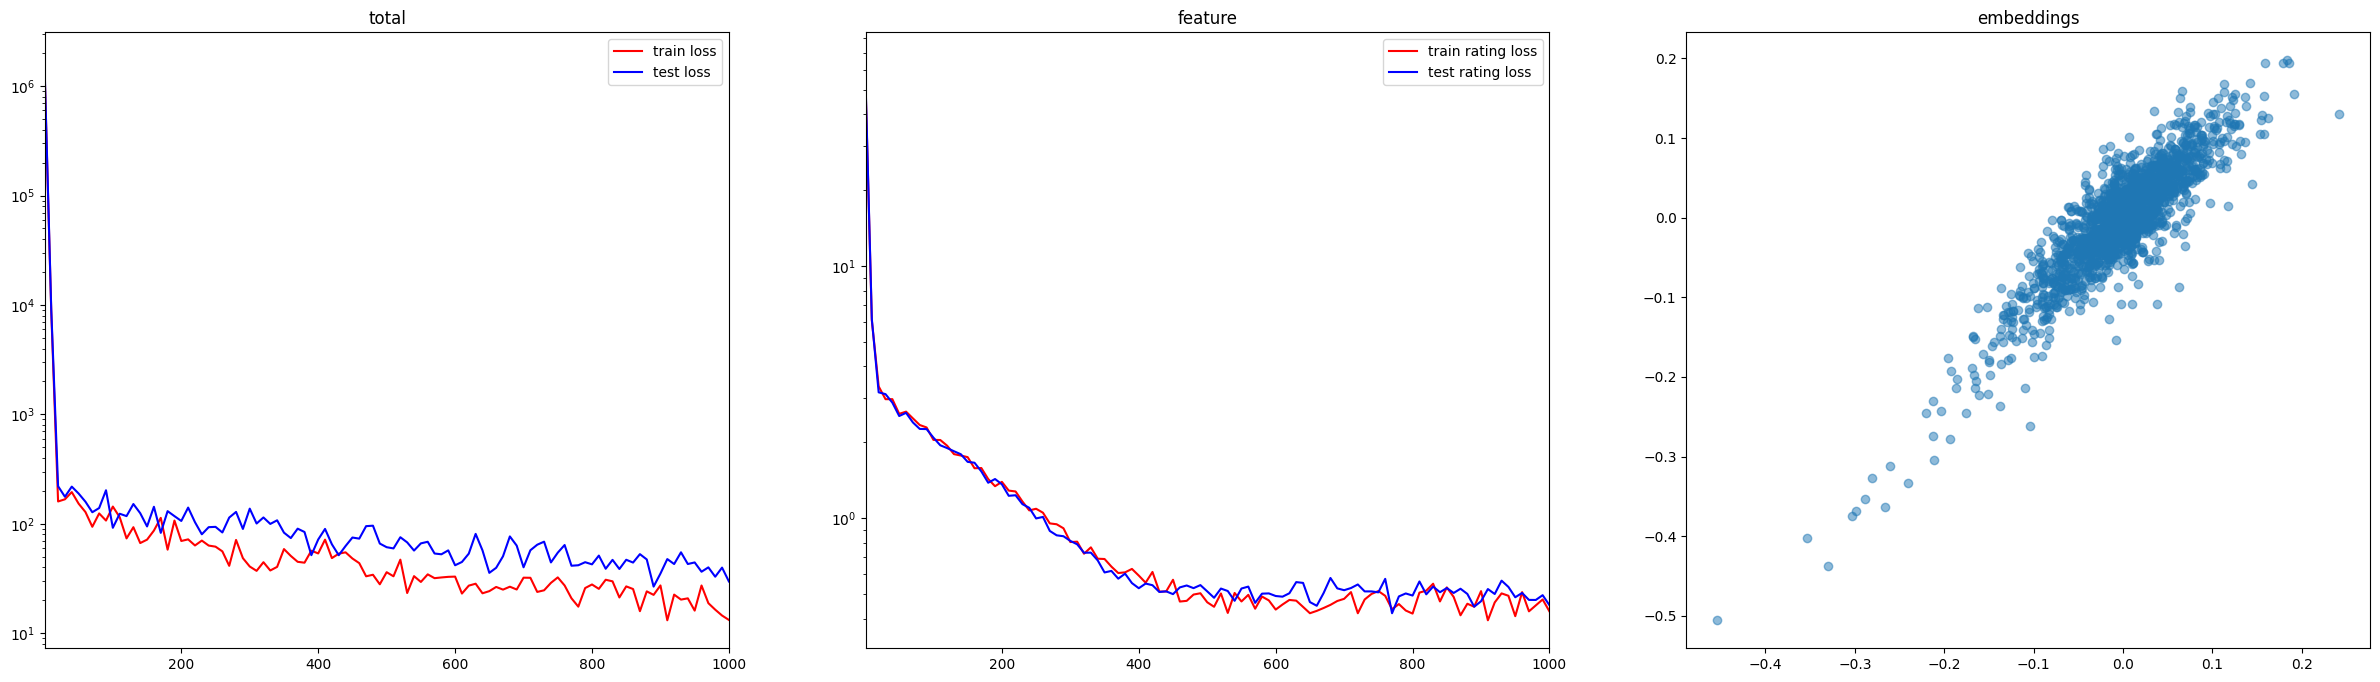

In [64]:
import math 
#import tensorflow as tf
#@title Training a DNN Similarity Model

#Define some constants related to this dataset
sparse_feature_names = ('maker', 'maker_location', 'broad_origin',
                       'specific_origin', 'bean_type')
dense_feature_names = ('reference_number', 'review_date', 'cocoa_percent', 
                      'rating')

#Set of features used as input to the similarity model.
input_feature_names = ('maker', 'maker_location', 'broad_origin',
                      'cocoa_percent', 'bean_type', 'rating',)
#Set of features used as output to the similarity model.
output_feature_names = ['rating'] #@param

# As a rule of thumb, a reasonable choice for the embedding dimension of a 
# sparse feature column is the log2 of the cardinality of its vocabulary.
# sparse_input_feature_embedding_dims = {'maker': 9, 'maker_location': 6,...}
default_embedding_dims = {
    sfn: int(round(math.log(choc_data[sfn].nunique()) / math.log(2)))
    for sfn in set(sparse_feature_names).intersection(input_feature_names)
}
#Dictionary mapping each sparse input features to the dimension of its embedding
#space
sparse_input_feature_embedding_dims = default_embedding_dims #can be a param

#Weight of the L2 regularization applies to the top embedding layer.
l2_regularization = 10 #@param
#List of dimension of the hidden layers of the deep neural network.
hidden_dims = [20, 10] #@param

print('------- build model')
with tf.Graph().as_default():
    similarity_model = SimilarityModel(
        choc_data,
        input_feature_names = input_feature_names,
        output_feature_names= output_feature_names,
        dense_feature_names=dense_feature_names,
        sparse_input_feature_embedding_dims=sparse_input_feature_embedding_dims,
        hidden_dims = hidden_dims,
        l2_regularization=l2_regularization,
        batch_size=100,
        use_bias=True,
        inspect=True)

print('------ train model')
similarity_model.train(
    num_iterations=1000,
    learning_rate=0.1,
    optimizer=tf.train.AdagradOptimizer)
print('\n')







































### Cluster Chocolate Dataset

In [93]:
#@title Run cell to set up functions
def dfSimilarity(df, centroids):
    ### dfSimilarity = Calculate similarities for dataframe input
    ### We need to calculate ||a-b||^2 = |a|^2 - 2*|a|*|b|
    ### Implement this matrix operations
    ###See the Appendix for further explanation
    numPoints = len(df.index)
    numCentroids = len(centroids.index)
    ## Strictly speaking, we don't need to calculate the norm of points
    ##because it adds a constant bias to distances
    ## But calculating it so that the similarity doesn't go neagtive
    ## And that we expect similarities in [0,1] which aids debugging
    pointNorms = np.square(nla.norm(df, axis=1))
    pointNorms = np.reshape(pointNorms,[numPoints,1])
    ## Calculate the norm of centroids
    centroidNorms = np.square(nla.norm(centroids, axis=1))
    centroidNorms = np.reshape(centroidNorms, (1,numCentroids))
    ## Calculate |a|^2 + |b|^2 - 2*|a|*|b|
    similarities = pointNorms + centroidNorms - 2.0*np.dot(df, np.transpose(centroids))
    #Divide by the number of features
    #Which is 10 because the one-hot encoding means the "Maker" and "Bean" are
    #weighted twice
    similarities = similarities/10
    #numerical artifacts lead to negligible but negative values that go to NaN on the root
    similarities = similarities.clip(min=0.0)
    #square root since it's ||a-b||^2
    similarities = np.sqrt(similarities)
    return similarities

def initCentroids(df,k, feature_cols):
    #Pick 'k' examples are random to serve as initial centroids
    limit = len(df.index)
    centroids_key = np.random.randint(0, limit-1, k)
    centroids = df.loc[centroids_key, feature_cols].copy(deep=True)
    #use indexes get copied over so reset them
    centroids.reset_index(drop=True, inplace=True)
    return centroids
def pt2centroid(df,centroids, feature_cols):
    ### Calculate similarities between all points and centroids
    ### And assign points to the closest centroid + save that distance
    numCentroids = len(centroids.index)
    numExamples = len(df.index)
    #dfSimilarity = calculate similarities for dataframe input
    dist = dfSimilarity(df.loc[:,feature_cols], centroids.loc[:, feature_cols])
    df.loc[:,'centroid'] = np.argmin(dist, axis=1) #Closest centroid
    df.loc[:,'pt2centroid'] = np.min(dist, axis=1) #minimum distance
    return df
    
def recomputeCentroids(df, centroids, feature_cols):
    ### For every centroid, recompute it as ana average of the points
    ### assigned to it
    numCentroids = len(centroids.index)
    for cen in range(numCentroids):
        dfSubset = df.loc[df['centroid'] == cen, feature_cols] #all points for centroid
        if not(dfSubset.empty): #If there are points assigned to centroid
            clusterAvg = np.sum(dfSubset)/len(dfSubset.index)
            centroids.loc[cen] = clusterAvg
    return centroids

def kmeans(df, k, feature_cols, verbose):
    flagConvergence = False
    maxIter = 100
    iter = 0     #ensure kmeans doesn't run forever
    centroids = initCentroids(df,k,feature_cols)
    while not(flagConvergence):
        iter + 1
        #save old mapping of points to centroids
        oldMapping = df['centroid'].copy(deep=True)
        #Perform k-means
        df = pt2centroid(df,centroids, feature_cols)
        centroids = recomputeCentroids(df, centroids, feature_cols)
        #check convergence by comparing [oldMapping, newMapping]
        newMapping = df['centroid']
        flagConvergence = all(oldMapping == newMapping)
        if verbose == 1:
            print("Total distance:" + str(np.sum(df['pt2centroid'])))
        if (iter > maxIter):
            print("k-means did not converge! Reached maximum iteration limit of "\
            + str(maxIter) + '.')
            sys.exit()
            return
    print("k-means converged for " + str(k) + "clusters" +\
          " after" + str(iter) + "iterations!")
    return [df,centroids]


In [94]:
#Run the code
k = 160 #@param

#Extract the embeddings into a dataframe
choc_embed = similarity_model.embeddings
choc_embed = pd.DataFrame(choc_embed)
#choc_embed

feature_cols = choc_embed.columns.values #Save original columns
#Initialize every point to an impossible value, the k+1 cluster
choc_embed['centroid'] = k
#initi the point to centroid distance to an impossible value "2" (>1)
choc_embed['pt2centroid'] = 2
[choc_embed, centroids] = kmeans(choc_embed,k,feature_cols,1)
print("Data for the first few chocolates, with 'centroid' and 'pt2centroid' on the extreme right:")
choc_embed.head()

Total distance:25.940277
Total distance:23.184977
Total distance:22.492336
Total distance:22.22208
Total distance:22.061306
Total distance:21.949577
Total distance:21.859634
Total distance:21.784369
Total distance:21.765543
Total distance:21.74416
Total distance:21.736654
Total distance:21.725946
Total distance:21.720955
Total distance:21.720139
Total distance:21.719215
k-means converged for 160clusters after0iterations!
Data for the first few chocolates, with 'centroid' and 'pt2centroid' on the extreme right:


,0,1,2,3,4,5,6,7,8,9,centroid,pt2centroid
0,-0.03,-0.02,-0.02,0.03,-0.02,0.04,0.01,0.04,0.01,0.03,28,0.01
1,0.15,0.12,0.17,-0.27,0.02,-0.10,-0.09,-0.18,-0.01,-0.09,87,0.02
2,-0.01,0.01,0.03,-0.03,0.04,-0.02,-0.01,-0.03,0.03,-0.01,63,0.01
3,-0.01,0.01,-0.03,0.02,-0.02,-0.01,0.01,0.02,-0.02,-0.00,151,0.01
4,-0.01,0.04,-0.01,-0.05,0.01,-0.03,0.03,0.02,0.00,-0.02,9,0.01


### Inspect the results

In [99]:
clusterNumber = 100 #@param
choc_data.loc[choc_embed['centroid'] == clusterNumber]

,maker,specific_origin,reference_number,review_date,cocoa_percent,maker_location,rating,bean_type,broad_origin
402,Chocolate Makers,Tres Hombres,1530,2015,75.00,Netherlands,3.25,Trinitario,Dominican Republic
638,Ethereal,Dominican Republic,1275,2014,80.00,U.S.A.,3.75,,Dominican Republic
1277,Patric,"Piura,Choc Garage Exclusive",1034,2013,67.00,U.S.A.,4.00,,Peru
1364,Ranger,"Tumbes,Batch 2",1562,2015,73.00,U.S.A.,3.50,Criollo,Peru
1495,Sol Cacao,"Ecuador,Batch 1",1812,2016,70.00,U.S.A.,3.50,,Ecuador


### Quality Metrics for Clusters

In [100]:
#@title Run cell to setup functions { display-mode: "form" }
def clusterCardinality(df):
  k = np.max(df["centroid"]) + 1
  if six.PY2:
    k = k.astype(int)
  print("Number of clusters:"+str(k))
  clCard = np.zeros(k)
  for kk in range(k):
    clCard[kk] = np.sum(df["centroid"]==kk)
  if six.PY2:
    clCard = clCard.astype(int)
  # print "Cluster Cardinality:"+str(clCard)
  plt.figure()
  plt.bar(range(k),clCard)
  plt.title('Cluster Cardinality')
  plt.xlabel('Cluster Number: '+str(0)+' to '+str(k-1))
  plt.ylabel('Points in Cluster')
  return clCard

def clusterMagnitude(df):
  k = np.max(df["centroid"]) + 1
  if six.PY2:
    k = k.astype(int)
  cl = np.zeros(k)
  clMag = np.zeros(k)
  for kk in range(k):
    idx = np.where(df["centroid"]==kk)
    idx = idx[0]
    clMag[kk] = np.sum(df.loc[idx,"pt2centroid"])
  # print "Cluster Magnitude:",clMag #precision set using np pref
  plt.figure()
  plt.bar(range(k),clMag)
  plt.title('Cluster Magnitude')
  plt.xlabel('Cluster Number: '+str(0)+' to '+str(k-1))
  plt.ylabel('Total Point-to-Centroid Distance')
  return clMag

def plotCardVsMag(clCard,clMag):
  plt.figure()
  plt.scatter(clCard,clMag)
  plt.xlim(xmin=0)
  plt.ylim(ymin=0)
  plt.title('Magnitude vs Cardinality')
  plt.ylabel('Magnitude')
  plt.xlabel('Cardinality')

def clusterQualityMetrics(df):
  clCard = clusterCardinality(df)
  clMag = clusterMagnitude(df)
  plotCardVsMag(clCard,clMag)

Number of clusters:160


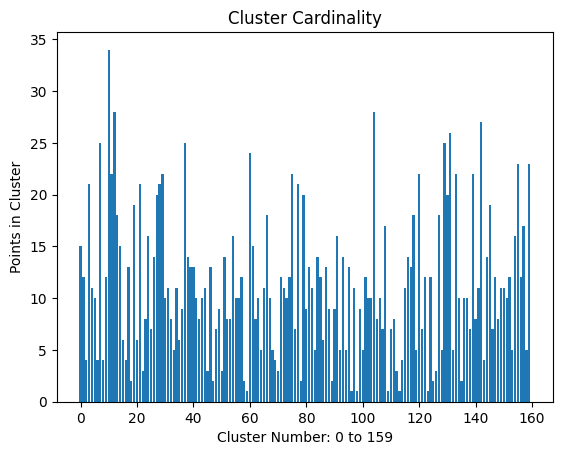

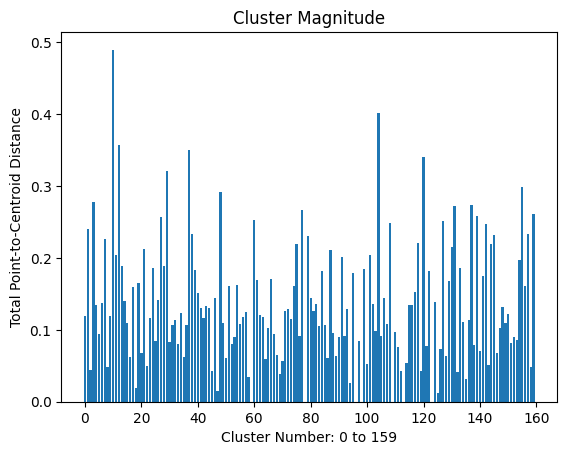

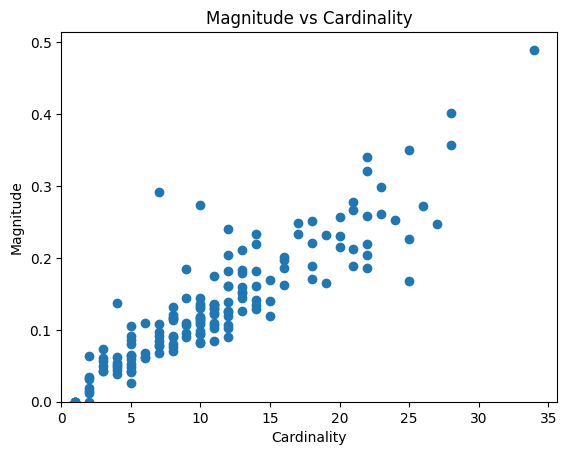

In [104]:
clusterQualityMetrics(choc_embed)

k-means converged for 5clusters after0iterations!
k-means converged for 15clusters after0iterations!
k-means converged for 25clusters after0iterations!
k-means converged for 35clusters after0iterations!
k-means converged for 45clusters after0iterations!
k-means converged for 55clusters after0iterations!
k-means converged for 65clusters after0iterations!
k-means converged for 75clusters after0iterations!
k-means converged for 85clusters after0iterations!
k-means converged for 95clusters after0iterations!
k-means converged for 105clusters after0iterations!
k-means converged for 115clusters after0iterations!
k-means converged for 125clusters after0iterations!
k-means converged for 135clusters after0iterations!
k-means converged for 145clusters after0iterations!
k-means converged for 155clusters after0iterations!
k-means converged for 165clusters after0iterations!
k-means converged for 175clusters after0iterations!
k-means converged for 185clusters after0iterations!
k-means converged for 1

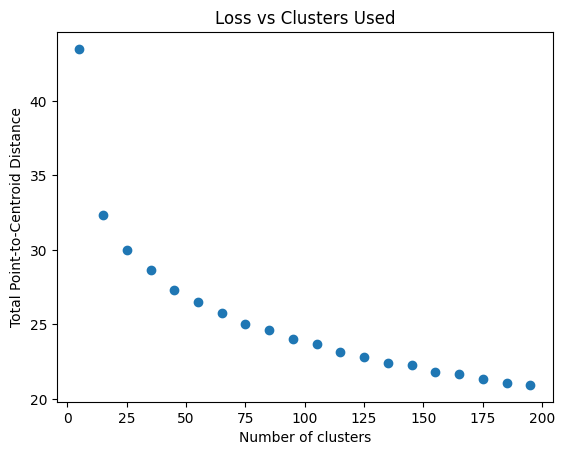

In [105]:
# Plot loss vs number of clusters
def lossVsClusters(kmin, kmax, kstep, choc_data):
  kmax += 1  # include kmax-th cluster in range
  kRange = range(kmin, kmax, kstep)
  loss = np.zeros(len(kRange))
  lossCtr = 0
  for kk in kRange:
    [choc_data, centroids] = kmeans(choc_data, kk, feature_cols, 0)
    loss[lossCtr] = np.sum(choc_data['pt2centroid'])
    lossCtr += 1
  plt.scatter(kRange, loss)
  plt.title('Loss vs Clusters Used')
  plt.xlabel('Number of clusters')
  plt.ylabel('Total Point-to-Centroid Distance')


kmin = 5  # @param
kmax = 200  # @param
kstep = 10  # @param
lossVsClusters(kmin, kmax, kstep, choc_embed)